<a href="https://colab.research.google.com/github/EstherCarrol/Inmersi-n-de-datos-Alura/blob/main/Riesgo_crediticio_banco_aleman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Riesgo Crediticio**

Determinar si una persona es o no objeto de credito

**Librerías a utilizar**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount('/content/Drive')
warnings.filterwarnings('ignore')

Mounted at /content/Drive


##**Preprocesamiento de los datos**


In [2]:
pd.set_option('display.max_columns',None)
global df_banco,resultados

df_banco = pd.read_csv('/content/Drive/MyDrive/inmersionPython/german_credit - german_credit.csv')
df_banco.head()#Trae las 5 primeras filas del dataset

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


Información detallada sobre las columnas

In [3]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

**Hay columnas con valores numéricos y con valores de texto. Se necesita tener todos los datos con valores numéricos**

Determinando la categoría dentro de cada columna

In [4]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
columnas

for columna in columnas:
  print(f'El nombre de la columna:{columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

El nombre de la columna:account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna:credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna:purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna:savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna:present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna:personal_status_sex
['male : single', 'female : di

In [5]:
def preProcesarDatos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco #Elimina los duplicados
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco #No hay datos nulos?

  a = {'< 0 DM': 1,
       '0 <= ... < 200 DM': 2,
       '>= 200 DM / salary assignments for at least 1 year': 3,
       'no checking account': 4
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [6]:
preProcesarDatos()
df_banco.sample(5) #para tomar muestras aleatorias

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
11,1,1,48,3,10,4308,5,4,3,2,1,4,2,24,3,1,1,3,1,0,1
849,1,1,12,3,5,709,5,1,4,3,1,4,1,57,2,2,1,2,1,0,1
300,0,4,6,3,1,672,5,5,1,2,1,4,1,54,3,2,1,1,1,1,1
687,0,2,36,4,1,2862,4,1,4,3,1,3,4,30,3,3,1,3,1,0,1
811,0,2,6,3,5,484,5,2,3,4,3,3,1,28,1,2,1,2,1,0,1


#**Exploración de los datos**

Observando los datos, hay variables que están muy dispersas por lo cual hay que establecer rangos.


1.   duración en meses del prestamo
2.   El monto del crédito
3.   Edad

**Antes de establcer los rangos hay que analizar la distribución de estos datos**



In [7]:
def analisisExploratorioHistogramas(histogramas):
  global df_banco
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

In [8]:
def analisisExploratorioBoxplots(boxplots):
  global df_banco
  lista_boxplots = list(enumerate(boxplots))
  plt.figure(figsize = (30,20))
  plt.title('BoxPlots')
  for i in lista_boxplots:
    plt.subplot(3, 1, i[0]+1)
    sns.boxplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

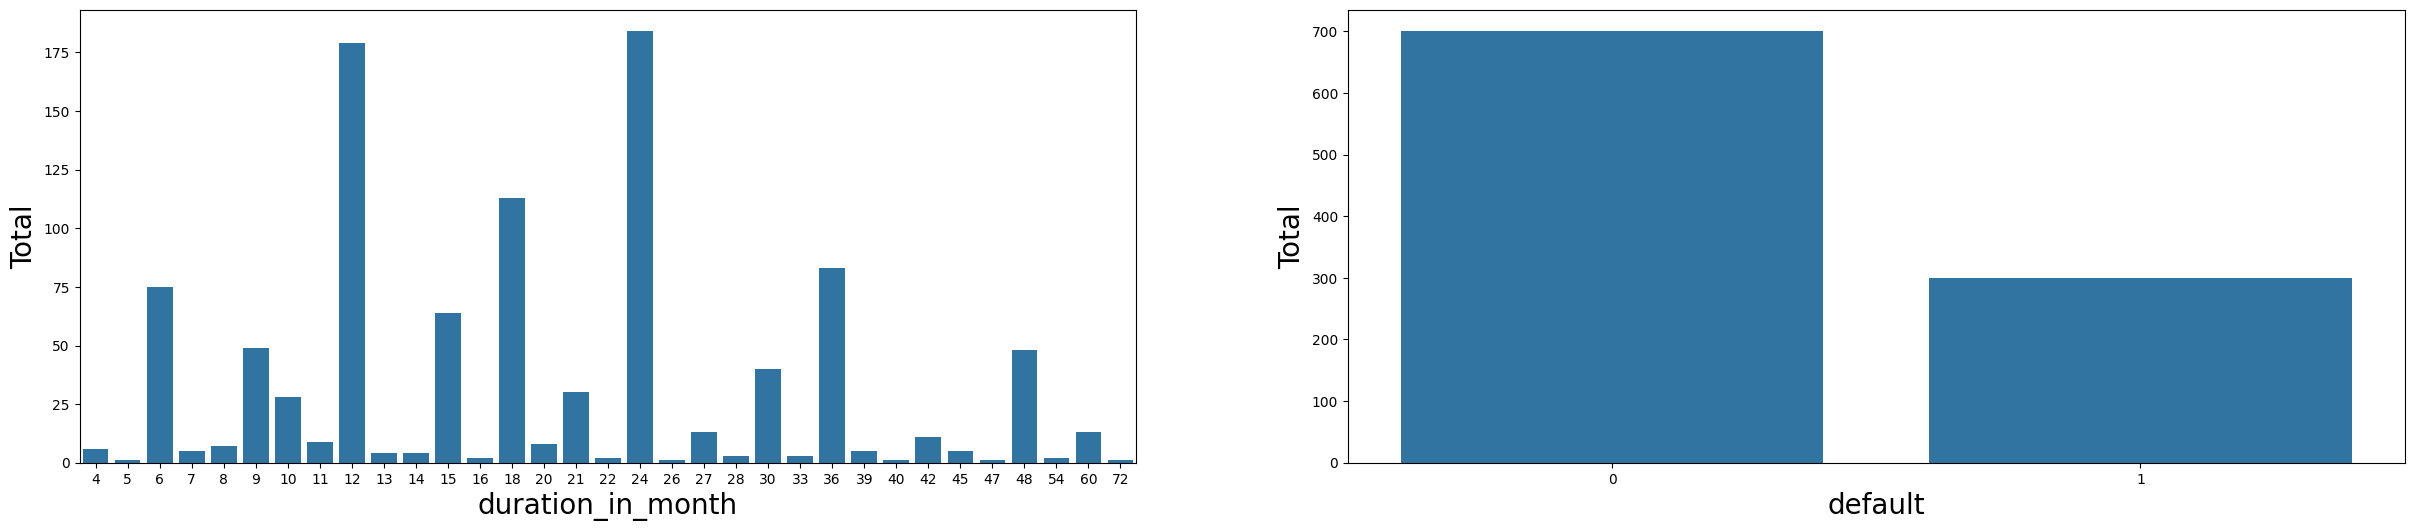

In [9]:
analisisExploratorioHistogramas(['duration_in_month','default'])

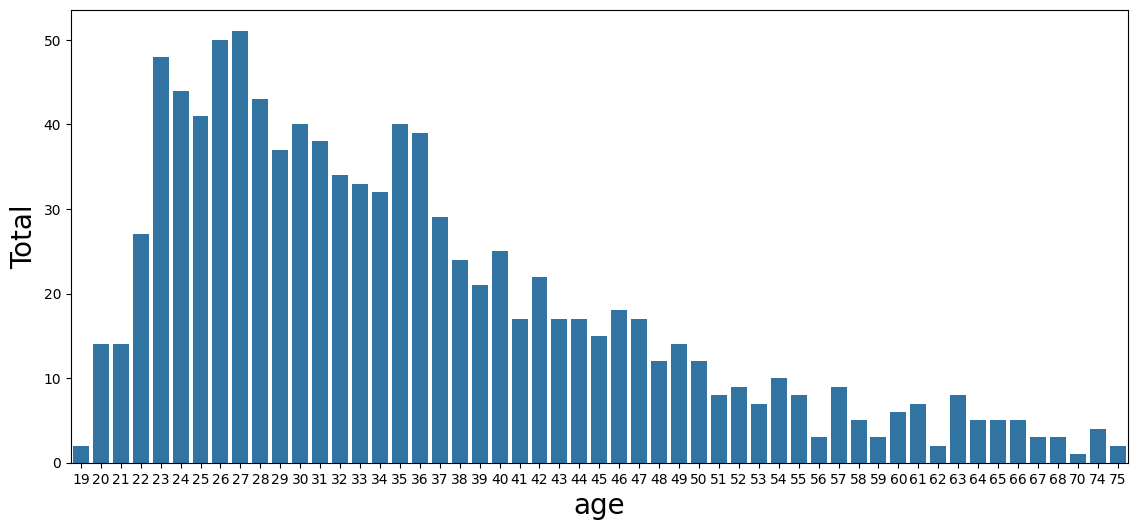

In [10]:
analisisExploratorioHistogramas(['age'])

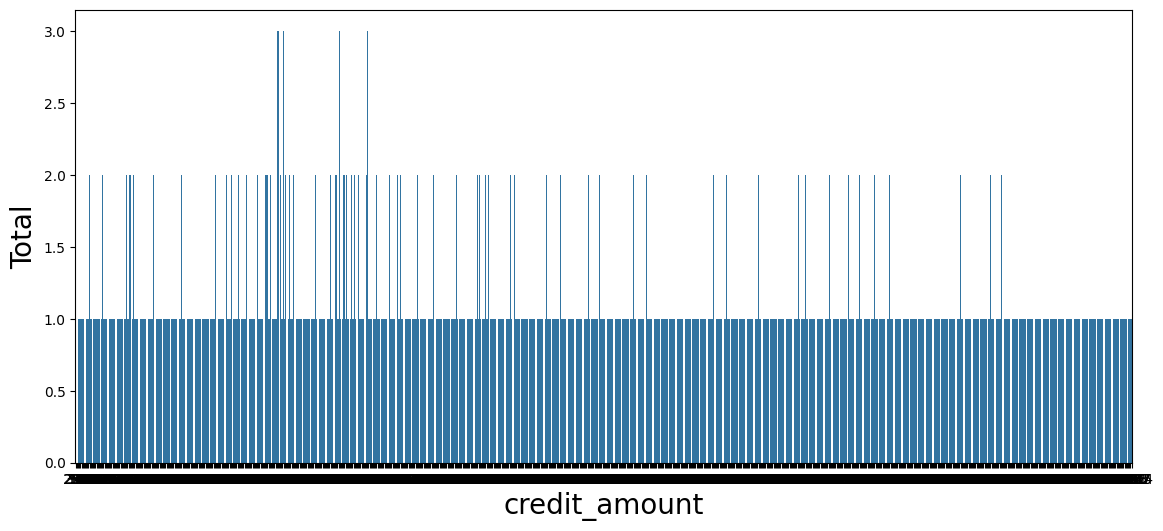

In [11]:
analisisExploratorioHistogramas(['credit_amount'])

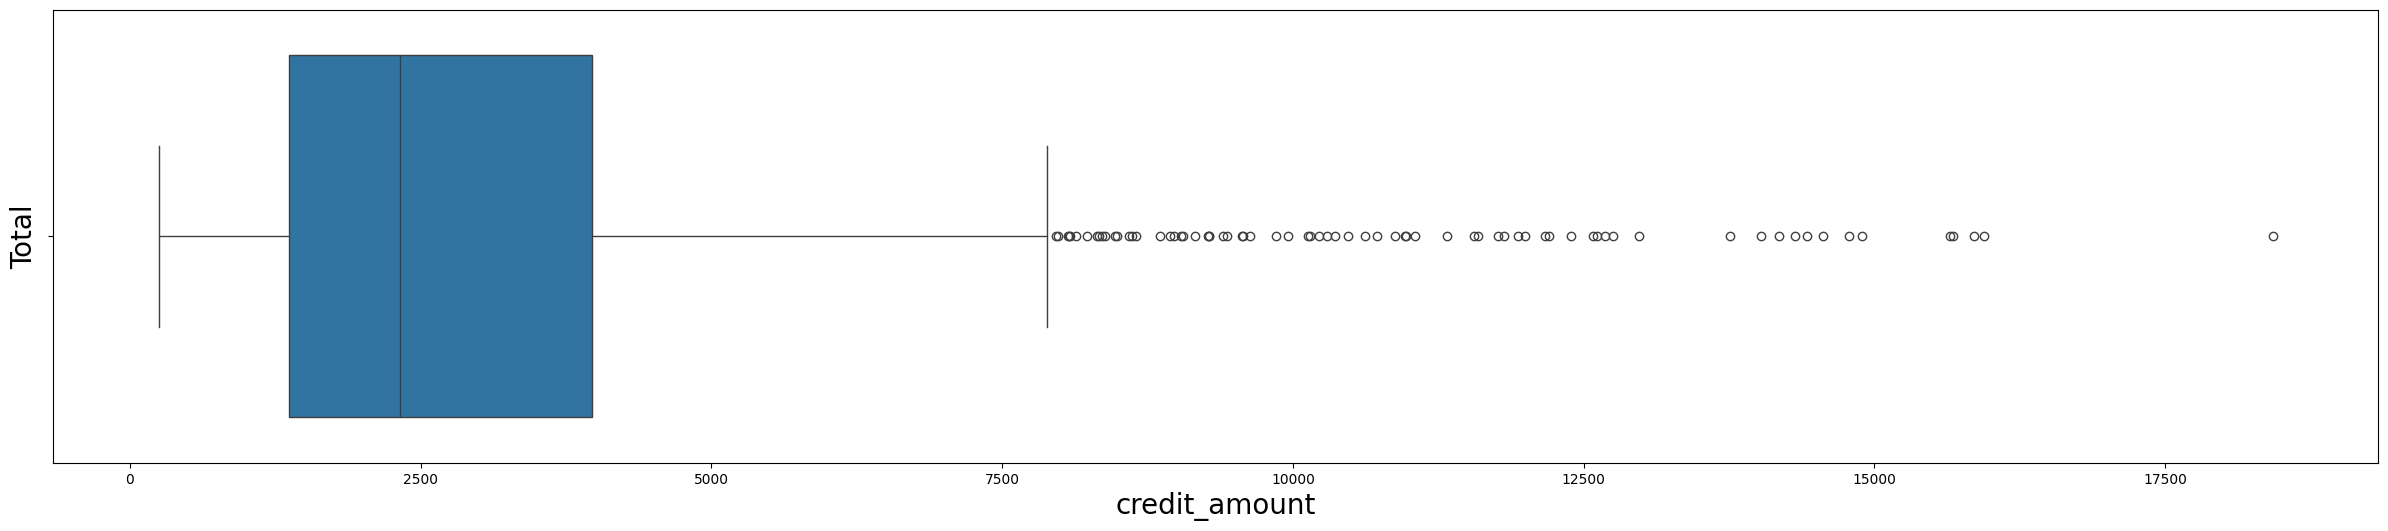

In [12]:
analisisExploratorioBoxplots(['credit_amount'])

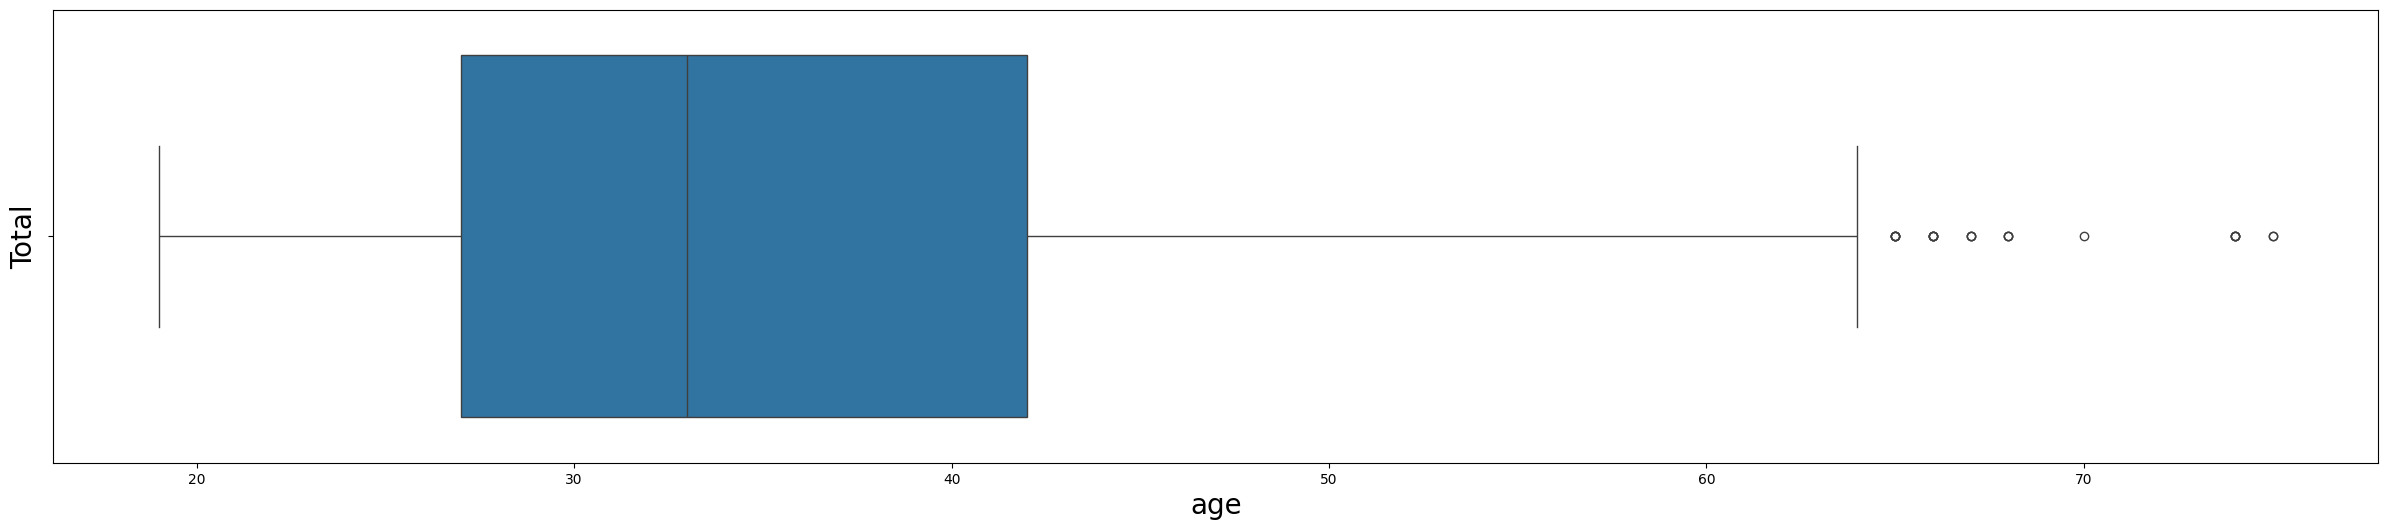

In [13]:
analisisExploratorioBoxplots(['age'])

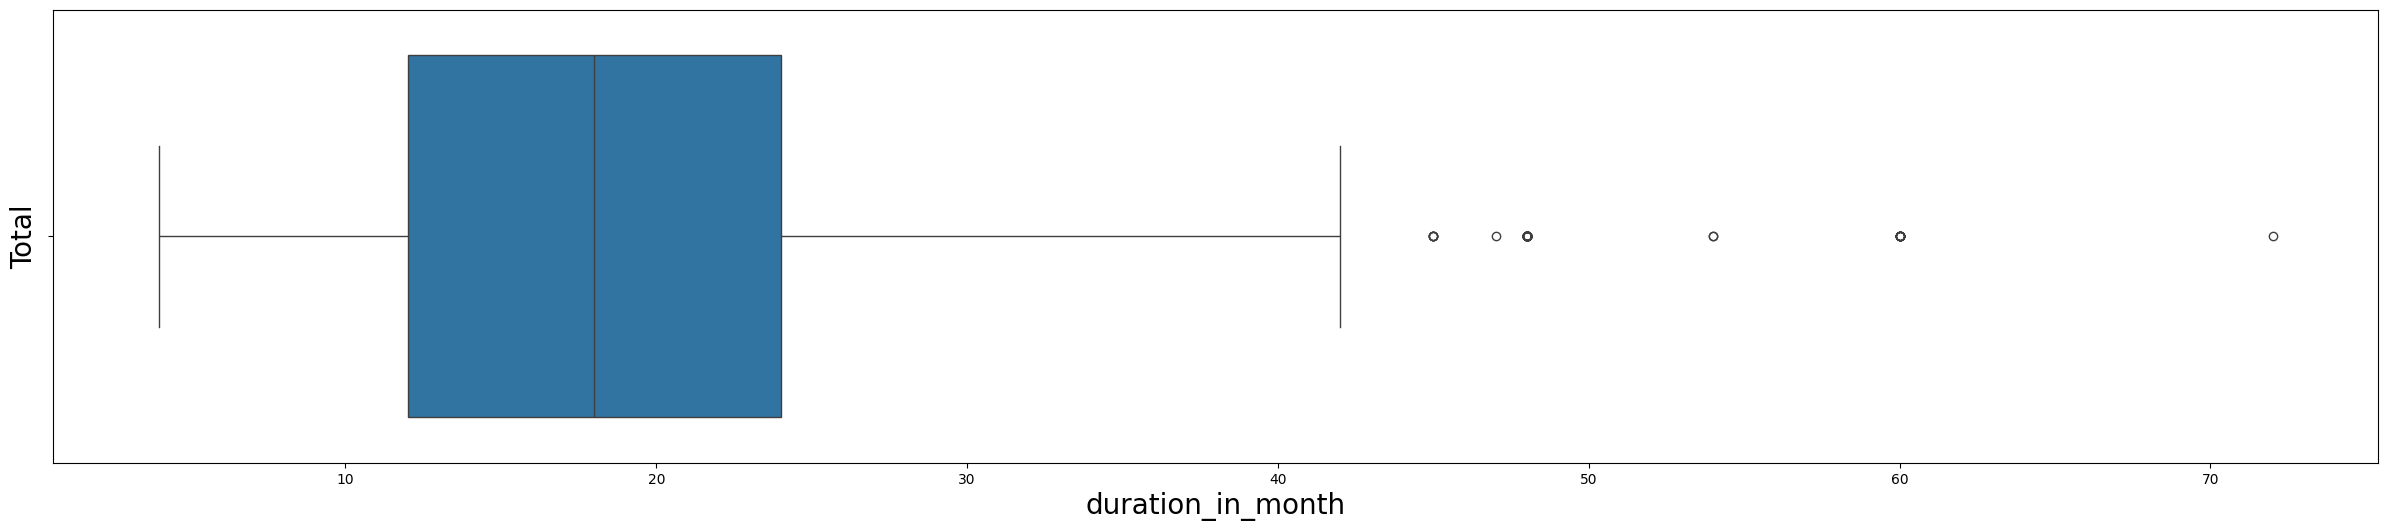

In [14]:
analisisExploratorioBoxplots(['duration_in_month'])

**En este punto se observa que hay algunos rangos con pocos datos, (e.g en los campos de edad, plazos de crédito)**
Para establecer los rangos  se realizará análisis con boxplots y cuantiles para ajustar los rangos


Analizando los gráficos anteriores se establcen las siguientes categorías

In [15]:
def featureEngineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'], #funcion de pandas que permite establecer rangos de valores a través de bins
                                  bins=[18, 25, 30, 35, 40, 45, 50, 60, 80],
                                  labels = [1, 2, 3, 4, 5, 6, 7, 8]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48,84],
                                            labels = [1, 2, 3, 4, 5]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 3000,
                                                 5000, 7000, 9000,
                                                  11000, 13000,
                                                  15000, 17000,
                                                  19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [16]:
featureEngineering()
df_banco.sample(5)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
38,0,3,3,6,5,3,2,1,2,3,3,2,1,3,1,1,1,0,1,4,1,2
202,0,4,4,10,5,2,3,1,4,3,3,2,2,3,1,0,1,0,1,2,3,4
860,0,4,5,2,2,3,4,1,2,1,3,2,2,3,1,0,1,0,1,2,2,4
957,0,2,5,5,5,1,2,1,4,1,3,2,3,2,1,0,1,0,1,4,1,2
364,1,1,3,4,5,5,4,1,1,3,3,2,1,1,1,0,1,0,1,1,2,2


In [17]:
def analisisExploratorioHistogramas(histogramas):
  global df_banco
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

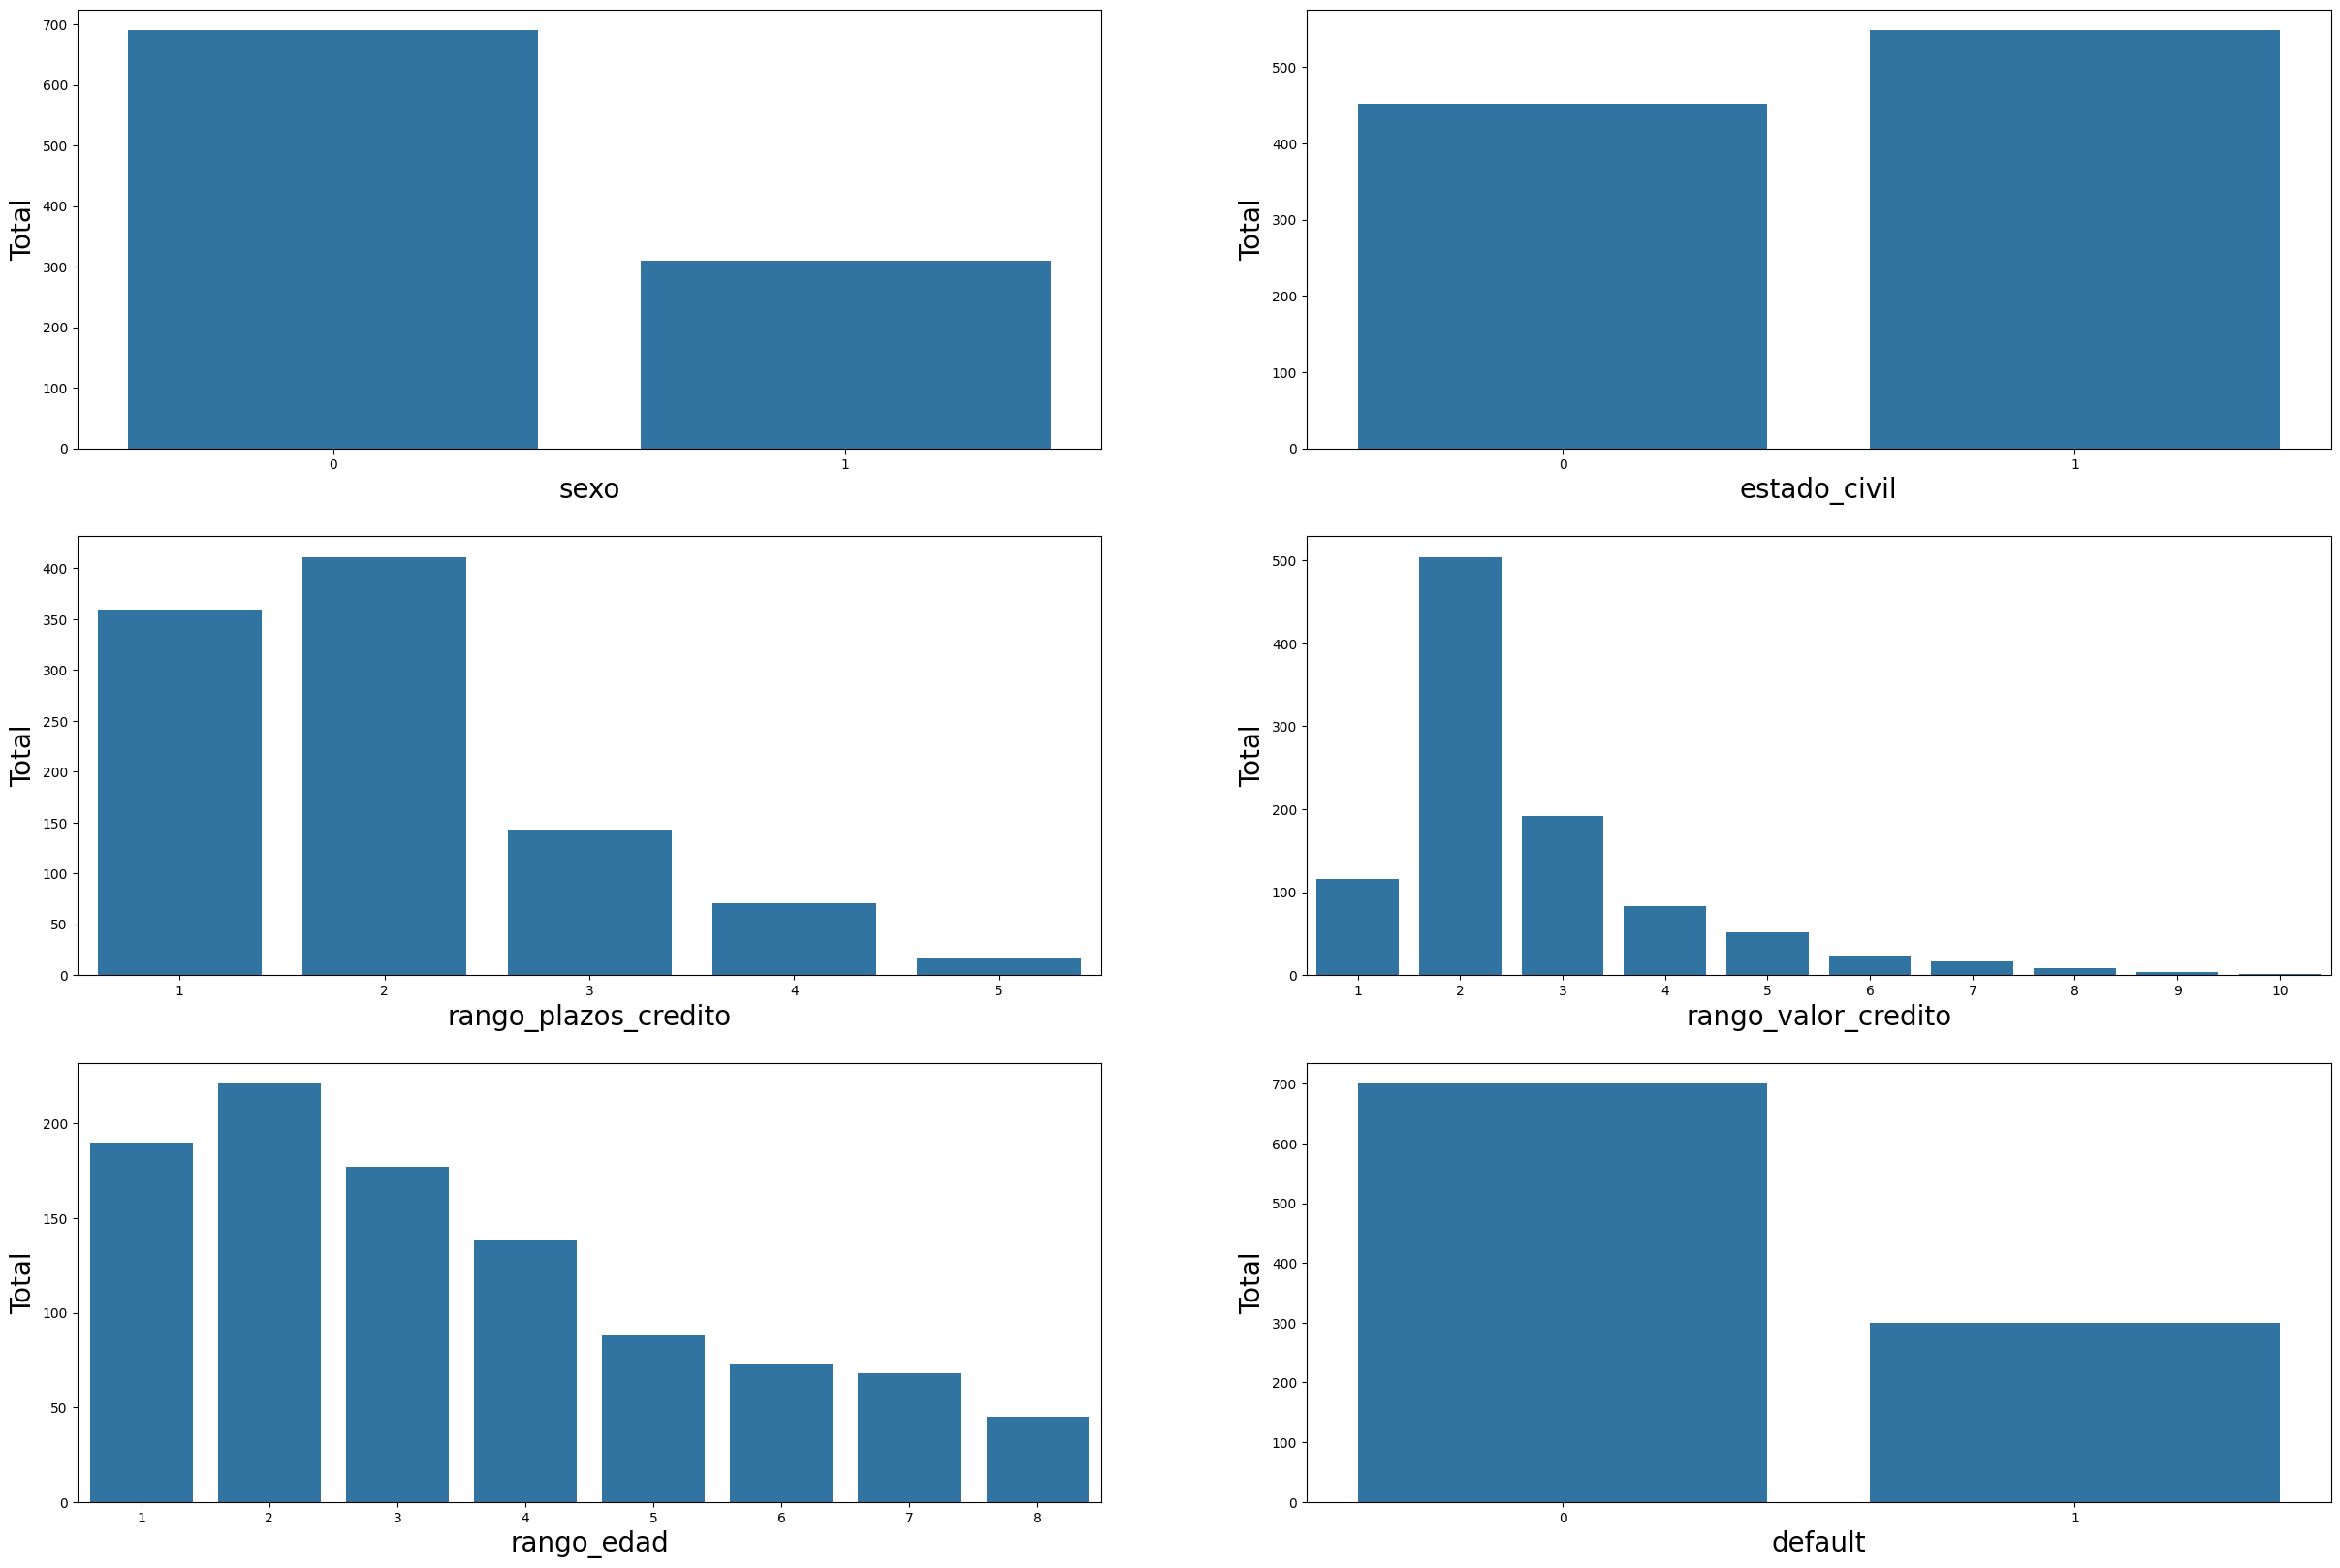

In [18]:
analisisExploratorioHistogramas(['sexo','estado_civil','rango_plazos_credito', 'rango_valor_credito','rango_edad','default'])

**Boxplots**

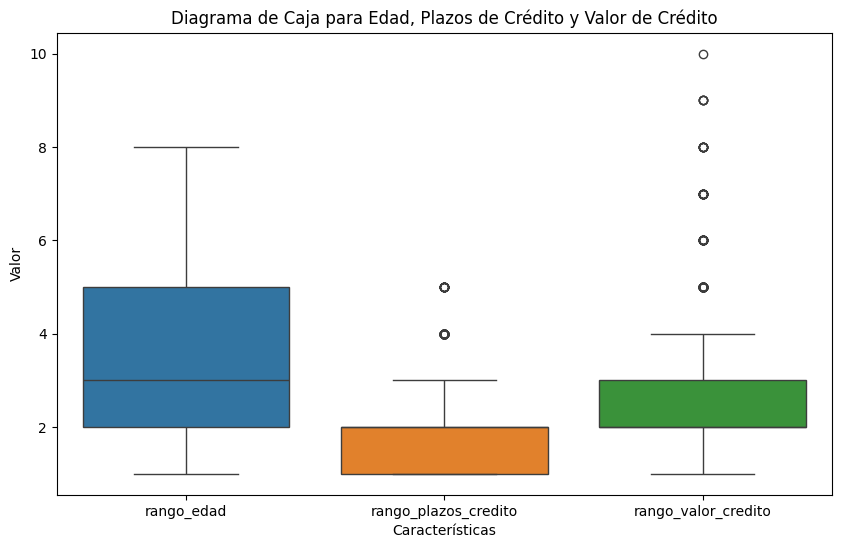

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_banco[['rango_edad', 'rango_plazos_credito', 'rango_valor_credito']])
plt.title('Diagrama de Caja para Edad, Plazos de Crédito y Valor de Crédito')
plt.ylabel('Valor')
plt.xlabel('Características')
plt.show()

**Cunatiles**

In [20]:
cuantiles = df_banco[['rango_edad', 'rango_plazos_credito', 'rango_valor_credito']].quantile([0.25, 0.5, 0.75])
print(cuantiles)

      rango_edad  rango_plazos_credito  rango_valor_credito
0.25         2.0                   1.0                  2.0
0.50         3.0                   2.0                  2.0
0.75         5.0                   2.0                  3.0


**Visualizar la densidad**

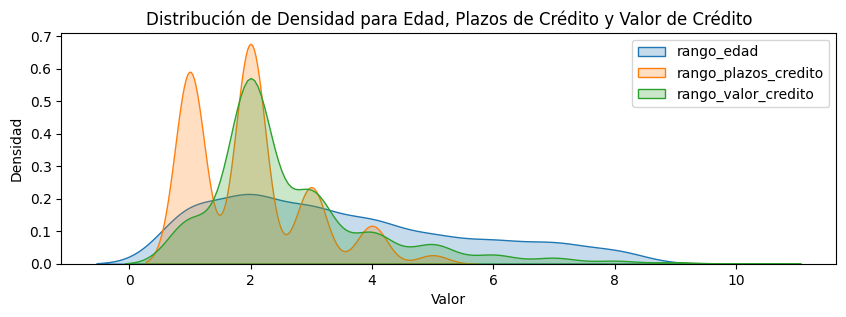

In [21]:
plt.figure(figsize=(10, 3))  # Ajusta el tamaño de la figura según tus necesidades
for columna in ['rango_edad', 'rango_plazos_credito', 'rango_valor_credito']:
    sns.kdeplot(df_banco[columna], label=columna, shade=True)

plt.title('Distribución de Densidad para Edad, Plazos de Crédito y Valor de Crédito')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

#**Mapa de calor**

Mediante el mapa de calor se espera observar la correlación de las variables y así determinar que atributos o campos se llevaran al modelo

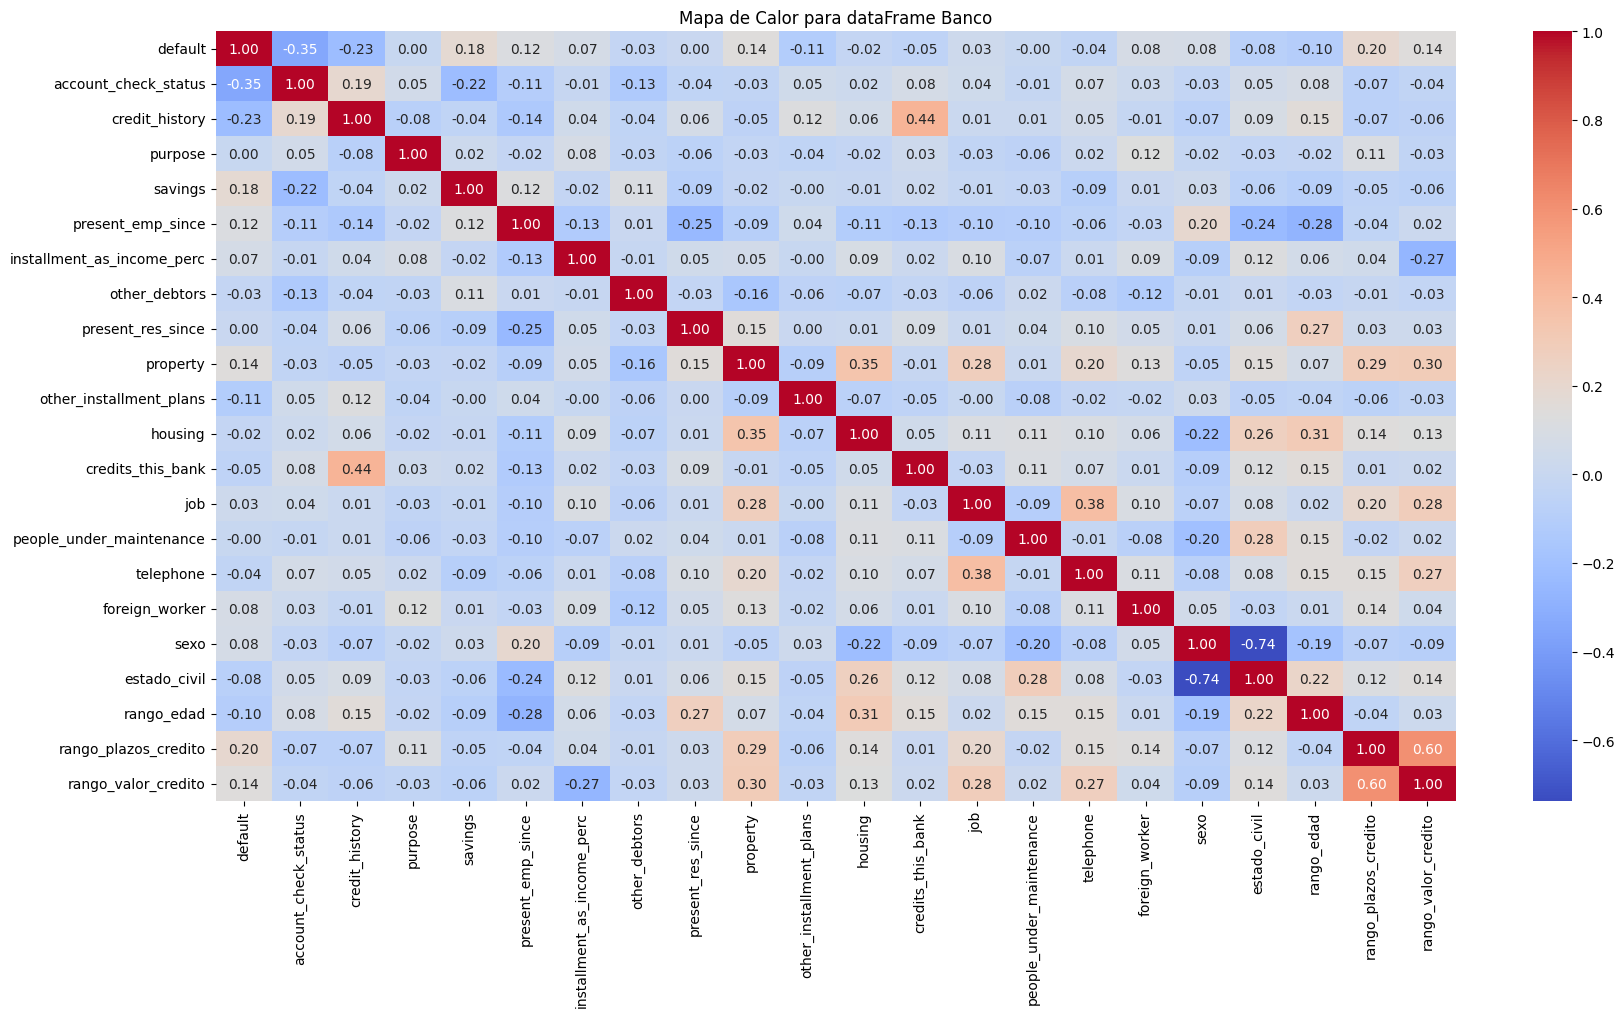

In [22]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor para dataFrame Banco')
plt.show()

#**Conclusiones del gráfico y la observación**


1.   El campo purpose no determina si alguien puede ser objeto o no de crédito. Se elimina
2.  El campo telephone no determina si alguien puede ser objeto o no de crédito. Se elimina
3.   Se observa una considerable correlación entre credit_history y credits_this_bank, se eliminará credits_this_bank para evitar la multicolinealidad


In [23]:
df_banco = df_banco.drop(columns=['purpose','telephone','credits_this_bank'])

#**Construcción del modelo de Machine Learning**

In [24]:
from sklearn.model_selection import train_test_split #Ayuda a dividir bases en datos de entrenamiento y datos de prueba
#Modelos de machine Learning (modelos de clasificación)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#Metricas de evaluación, evaluar la predicción de los modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [25]:
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

#Generamos 4 modelos
  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }
#Variables para los resultados
  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)#Área bajo la curva

  resultados = results

In [26]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.7939578352532058


Árbol de Decisión
0.73
0.5333333333333333
0.46511627906976744
0.4968944099378882
0.6507824386003043


Random Forest
0.7866666666666666
0.7391304347826086
0.3953488372093023
0.5151515151515151
0.802868941534449


Naive Bayes
0.75
0.5617977528089888
0.5813953488372093
0.5714285714285714
0.7836339926103022




#**Evaluación y selección del modelo**

In [27]:
def visualizaResultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

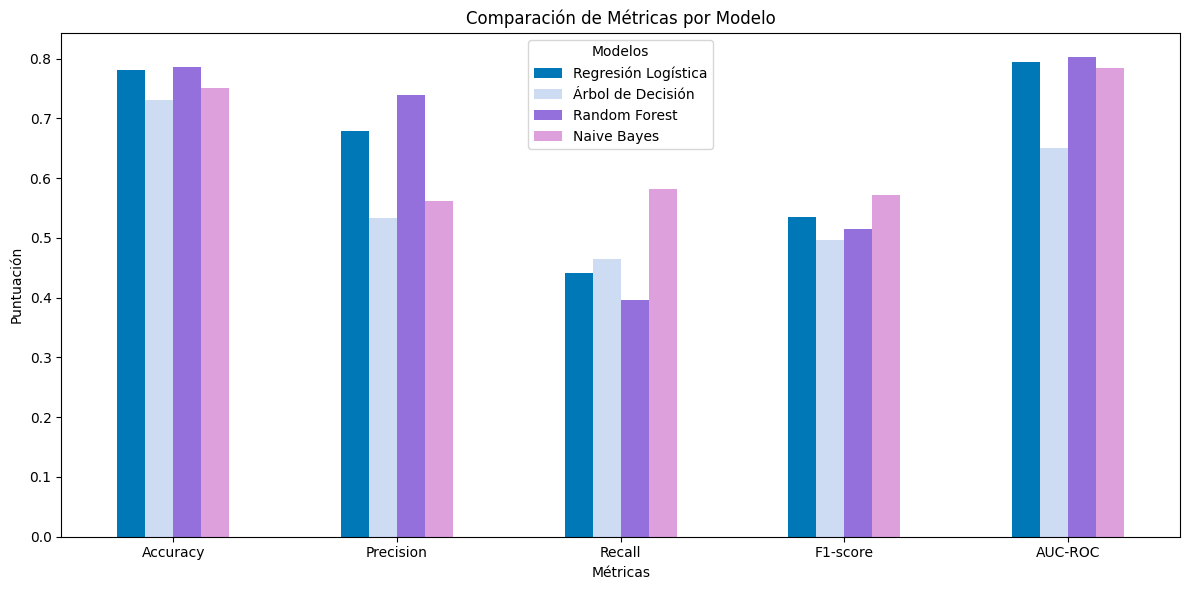

In [28]:
visualizaResultados()

En este caso se quiere minimizar los falsos negativos, evitar que un mal cliente (1) sea clasificado como bueno (0).

Accuracy no es una buena medida porque no hay balance de buenos y malos clientes. Existen 70% de registros de buenos clientes y 30% de malos.
[(Data, 2019)](https://sitiobigdata.com/2019/01/19/machine-learning-metrica-clasificacion-parte-3/)

**Recall** es una métrica que se puede considerar pues cuanto más alta sea menos falsos negativos se tendrán [(Data, 2019)](https://sitiobigdata.com/2019/01/19/machine-learning-metrica-clasificacion-parte-3/)


**F1 Score** se toma en cuenta porque el conjunto de datos esta desbalanceado
[(Fuente)](https://www.themachinelearners.com/metricas-de-clasificacion/#F1_Score)



##**El modelo seleccionado es Naive Bayes**